In [36]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define the folder containing CSV files
csv_folder = 'tempres/csv/'

# Initialize a dictionary to store the results
result_map = {
            "run": [],
            "dadca_ack": [],
            "network": [],
            "repetition": [],
            "num_uavs": [],
            "uavs": [],
            "numFailuresUAV1": [],
            "numFailuresUAV2": [],
            "gs_data_received_max": []
        }

# Function to parse a CSV file and extract the desired data
def parse_csv_file(file_path):
    with open(file_path, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)  # Skip the header row

        f_run = None
        f_dadca_ack = False
        f_network = None
        f_repetition = None
        f_num_uavs = None
        f_uavs = {}
        f_numFailuresUAV1 = None
        f_numFailuresUAV2 = None
        f_gs_data_received_max = None        
        
        for row in reader:
            run, data_type, module, name, attrname, attrvalue, value, *_ = row

            if data_type == 'runattr':
                if attrname == 'network':
                    f_network = attrvalue
                elif attrname == 'repetition':
                    f_repetition = attrvalue
            elif data_type == 'itervar':
                if attrname == 'numFailuresUAV1':
                    f_numFailuresUAV1 = attrvalue
                elif attrname == 'numFailuresUAV2':
                    f_numFailuresUAV2 = attrvalue
            elif data_type == 'param':
                if attrname == '*.numUAVs':
                    f_num_uavs = attrvalue
                elif attrname == '*.quads[*].protocol.typename' and "DadcaAckUAVProtocol" in attrvalue:
                    f_dadca_ack = True
            elif data_type == 'scalar':
                if (name == 'bufferLoad:max' or name == 'bufferLoad:mean' or name == 'dataReceived:max' or name == 'dataReceived:mean') and 'quads' in module:
                    f_run = run
                    if not module in f_uavs:
                        f_uavs[module] = {name: float(value)}
                    else:
                        f_uavs[module][name] = float(value)
                elif name == 'dataReceived:max' and 'groundStation' in module:
                    f_gs_data_received_max = int(value)
        
        result_map["run"].append(f_run)
        result_map["dadca_ack"].append(f_dadca_ack)
        result_map["network"].append(f_network)
        result_map["repetition"].append(int(f_repetition))
        result_map["num_uavs"].append(int(f_num_uavs))
        result_map["uavs"].append(f_uavs)
        result_map["numFailuresUAV1"].append(int(f_numFailuresUAV1))
        result_map["numFailuresUAV2"].append(int(f_numFailuresUAV2))
        result_map["gs_data_received_max"].append(f_gs_data_received_max)
        

files = os.listdir(csv_folder)
n = len(files)
# Loop through all CSV files in the folder
i = 0
for filename in files:
    if filename.endswith(".csv"):
        print('Parsing file %d of %d (%.2f complete)' % (i, n, i/n*100), end='\r')
        file_path = os.path.join(csv_folder, filename)
        parse_csv_file(file_path)
    i += 1


In [37]:
df = pd.DataFrame(result_map)

In [38]:
df


,run,dadca_ack,network,repetition,num_uavs,uavs,numFailuresUAV1,numFailuresUAV2,gs_data_received_max
0,DADCA_ACK_n100_u2_a8000m2_0-DADCA-ACK-0-202310...,True,DADCA_ACK_n100_u2_a8000m2_0,0,2,{'DADCA_ACK_n100_u2_a8000m2_0.quads[0].protoco...,0,0,28447
1,DADCA_ACK_n100_u2_a8000m2_0-DADCA-ACK-1-202310...,True,DADCA_ACK_n100_u2_a8000m2_0,0,2,{'DADCA_ACK_n100_u2_a8000m2_0.quads[0].protoco...,0,1,34418
2,DADCA_ACK_n100_u2_a8000m2_0-DADCA-ACK-2-202310...,True,DADCA_ACK_n100_u2_a8000m2_0,0,2,{'DADCA_ACK_n100_u2_a8000m2_0.quads[0].protoco...,0,2,28396
3,DADCA_ACK_n100_u2_a8000m2_0-DADCA-ACK-3-202310...,True,DADCA_ACK_n100_u2_a8000m2_0,0,2,{'DADCA_ACK_n100_u2_a8000m2_0.quads[0].protoco...,0,3,38383
4,DADCA_ACK_n100_u2_a8000m2_0-DADCA-ACK-4-202310...,True,DADCA_ACK_n100_u2_a8000m2_0,0,2,{'DADCA_ACK_n100_u2_a8000m2_0.quads[0].protoco...,1,0,37937
...,...,...,...,...,...,...,...,...,...
1268,DADCA_ACK_n50_u2_a8000m2_9-DADCA-11-20231003-1...,False,DADCA_ACK_n50_u2_a8000m2_9,0,2,{'DADCA_ACK_n50_u2_a8000m2_9.quads[0].protocol...,2,3,9019
1269,DADCA_ACK_n50_u2_a8000m2_9-DADCA-12-20231003-1...,False,DADCA_ACK_n50_u2_a8000m2_9,0,2,{'DADCA_ACK_n50_u2_a8000m2_9.quads[0].protocol...,3,0,6886
1270,DADCA_ACK_n50_u2_a8000m2_9-DADCA-13-20231003-1...,False,DADCA_ACK_n50_u2_a8000m2_9,0,2,{'DADCA_ACK_n50_u2_a8000m2_9.quads[0].protocol...,3,1,21942
1271,DADCA_ACK_n50_u2_a8000m2_9-DADCA-14-20231003-1...,False,DADCA_ACK_n50_u2_a8000m2_9,0,2,{'DADCA_ACK_n50_u2_a8000m2_9.quads[0].protocol...,3,2,11638


In [44]:
# Assuming 'run' column contains the run IDs
df['num_sensors'] = df['run'].str.split('_').str[2]

# Convert the 'num_sensors' column to integer type
df['num_sensors'] = df['num_sensors'].str[1:].astype(int)

# Calculate 'total_failures' as the sum of 'numFailuresUAV1' and 'numFailuresUAV2'
df['total_failures'] = df['numFailuresUAV1'] + df['numFailuresUAV2']


In [45]:
df

,run,dadca_ack,network,repetition,num_uavs,uavs,numFailuresUAV1,numFailuresUAV2,gs_data_received_max,num_sensors,total_failures
0,DADCA_ACK_n100_u2_a8000m2_0-DADCA-ACK-0-202310...,True,DADCA_ACK_n100_u2_a8000m2_0,0,2,{'DADCA_ACK_n100_u2_a8000m2_0.quads[0].protoco...,0,0,28447,100,0
1,DADCA_ACK_n100_u2_a8000m2_0-DADCA-ACK-1-202310...,True,DADCA_ACK_n100_u2_a8000m2_0,0,2,{'DADCA_ACK_n100_u2_a8000m2_0.quads[0].protoco...,0,1,34418,100,1
2,DADCA_ACK_n100_u2_a8000m2_0-DADCA-ACK-2-202310...,True,DADCA_ACK_n100_u2_a8000m2_0,0,2,{'DADCA_ACK_n100_u2_a8000m2_0.quads[0].protoco...,0,2,28396,100,2
3,DADCA_ACK_n100_u2_a8000m2_0-DADCA-ACK-3-202310...,True,DADCA_ACK_n100_u2_a8000m2_0,0,2,{'DADCA_ACK_n100_u2_a8000m2_0.quads[0].protoco...,0,3,38383,100,3
4,DADCA_ACK_n100_u2_a8000m2_0-DADCA-ACK-4-202310...,True,DADCA_ACK_n100_u2_a8000m2_0,0,2,{'DADCA_ACK_n100_u2_a8000m2_0.quads[0].protoco...,1,0,37937,100,1
...,...,...,...,...,...,...,...,...,...,...,...
1268,DADCA_ACK_n50_u2_a8000m2_9-DADCA-11-20231003-1...,False,DADCA_ACK_n50_u2_a8000m2_9,0,2,{'DADCA_ACK_n50_u2_a8000m2_9.quads[0].protocol...,2,3,9019,50,5
1269,DADCA_ACK_n50_u2_a8000m2_9-DADCA-12-20231003-1...,False,DADCA_ACK_n50_u2_a8000m2_9,0,2,{'DADCA_ACK_n50_u2_a8000m2_9.quads[0].protocol...,3,0,6886,50,3
1270,DADCA_ACK_n50_u2_a8000m2_9-DADCA-13-20231003-1...,False,DADCA_ACK_n50_u2_a8000m2_9,0,2,{'DADCA_ACK_n50_u2_a8000m2_9.quads[0].protocol...,3,1,21942,50,4
1271,DADCA_ACK_n50_u2_a8000m2_9-DADCA-14-20231003-1...,False,DADCA_ACK_n50_u2_a8000m2_9,0,2,{'DADCA_ACK_n50_u2_a8000m2_9.quads[0].protocol...,3,2,11638,50,5


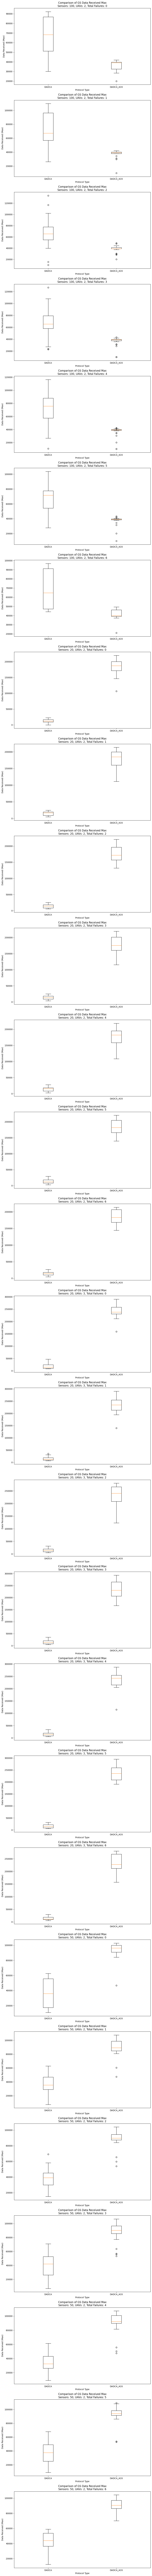

In [67]:
# Create a list of unique combinations of 'num_sensors', 'num_uavs', and 'total_failures'
combinations = df[['num_sensors', 'num_uavs', 'total_failures']].drop_duplicates()

# Create subplots for multiple box plots
fig, axes = plt.subplots(nrows=len(combinations), ncols=1, figsize=(10, 6 * len(combinations)))

# Loop through each combination and create plots
i = 0
for _, row in combinations.iterrows():
    num_sensors = row['num_sensors']
    num_uavs = row['num_uavs']
    total_failures = row['total_failures']
    
    # Filter the DataFrame for the current combination
    filtered_df = df[(df['num_sensors'] == num_sensors) & (df['num_uavs'] == num_uavs) & (df['total_failures'] == total_failures)]
    
    # Separate DataFrames for dadca and dadca_ack
    tdadca = filtered_df[filtered_df['dadca_ack'] == False]['gs_data_received_max']
    tdadca_ack = filtered_df[filtered_df['dadca_ack'] == True]['gs_data_received_max']
    
    # Create a box plot for the current combination
    axes[i].boxplot([tdadca, tdadca_ack], labels=['DADCA', 'DADCA_ACK'])
    axes[i].set_title(f'Comparison of GS Data Received Max\nSensors: {num_sensors}, UAVs: {num_uavs}, Total Failures: {total_failures}')
    axes[i].set_ylabel('Data Received (Max)')
    axes[i].set_xlabel('Protocol Type')
    i += 1
    
# Adjust subplot layout
plt.tight_layout()

# Show the box plots
plt.show()